# 나이와 금액의 관계를 분석합니다.

### 라이브러리 임포트

In [1]:
# =============
# imports
# =============
# import data_edit_tools
import pandas as pd
import numpy as np

# import Visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# import machinelearning tools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 데이터 불러오기

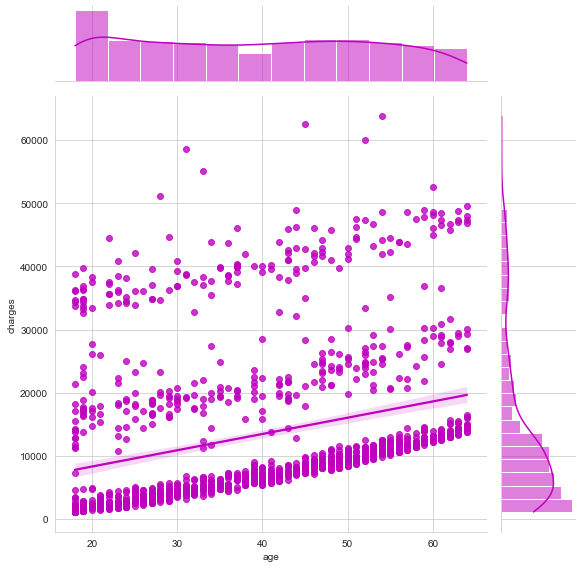

In [2]:
insurance_raw_df = pd.read_csv("./Dataset/insurance.csv")

def show_joinplot_graph(data, x_type, y_type, kind="scatter" ,color="m", height=5, hue=None):
    sns.set_style("whitegrid")
    sns.jointplot(x=f"{x_type}", y=f"{y_type}", data=data, color=f"{color}", height=height, kind=f"{kind}", hue=hue)
    plt.show()

show_joinplot_graph(data=insurance_raw_df, x_type = "age", y_type = "charges", color="m", height=8, kind="reg")

그래프를 보면 데이터가 많이 몰집되어있는 1개의 큰 선과 2개의 대이터가 넓게 분포되어있는 선이 있는것을 확인할수 있습니다.
또한 회귀분석을 통해 나이가 들면 들수록 점점 보험료가 증가되는사실을 확인할수 있습니다.

하지만, 이러한 데이터 양상이 아닌 나이에 따라 보혐금액을 예측하는 회귀분석적인 측면에서 위 결과를 보면 해당 선이 회귀분석결과로선
부적합하다는걸 알수 있습니다.

따라서 우리는 전체 데이터가 아닌 다른 방법으로 회귀분석을 수행해보고자 합니다.

## 회귀분석

### 담배를 피는 여부에 따라 분류

"Raw_Data_Visualization.ipynb" 노트북에서 저희는 흡연여부에 따라 위 데이터의 선형관계가 바뀌는것을 확인해 보았습니다.
위 그래프를 다시 시각화해보죠,

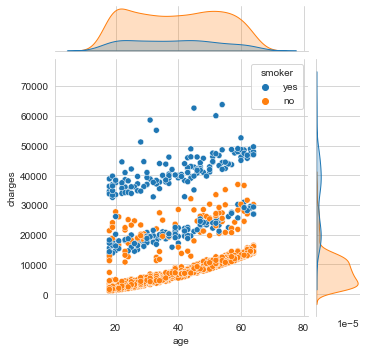

In [3]:
show_joinplot_graph(data=insurance_raw_df, x_type = "age", y_type = "charges", color="m", height=5, hue="smoker")

In [4]:
age_array = np.array(insurance_raw_df["age"])
charges_array = np.array(insurance_raw_df["charges"])

In [5]:
"""
class Linear():
    def __init__(self):
        self.lr = LinearRegression()
    def train(self, inputdata_x, inputdata_y):
        # 훈련세트와 테스트세트로 나누기
        train_input, test_input, self.train_target, self.test_target = train_test_split(inputdata_x, inputdata_y, random_state=42)
        # 훈련세트, 테스트세트를 2차원 배열으로 바꾸기
        self.train_input = train_input.reshape(-1,1)
        self.test_input = test_input.reshape(-1,1)

        # 모델을 훈련하기
        self.lr.fit(self.train_input, self.train_target)
        self.coef = self.lr.coef_
        self.intercept = self.lr.intercept_

    def get_coef_and_intercept(self):
        return self.coef, self.intercept

    def get_score(self, ret=None):
        if ret == None:
            print(f"훈련세트 정확도:{self.lr.score(self.train_input, self.train_target)}")
            print(f"테스트세트 정확도:{self.lr.score(self.test_input, self.test_target)}")
        if ret == True:
            return self.lr.score(self.train_input, self.train_target)


lr1 = Linear()
lr1.train(age_array, charges_array)
lr1.get_score()
lr1ele = lr1.get_coef_and_intercept()
"""

'\nclass Linear():\n    def __init__(self):\n        self.lr = LinearRegression()\n    def train(self, inputdata_x, inputdata_y):\n        # 훈련세트와 테스트세트로 나누기\n        train_input, test_input, self.train_target, self.test_target = train_test_split(inputdata_x, inputdata_y, random_state=42)\n        # 훈련세트, 테스트세트를 2차원 배열으로 바꾸기\n        self.train_input = train_input.reshape(-1,1)\n        self.test_input = test_input.reshape(-1,1)\n\n        # 모델을 훈련하기\n        self.lr.fit(self.train_input, self.train_target)\n        self.coef = self.lr.coef_\n        self.intercept = self.lr.intercept_\n\n    def get_coef_and_intercept(self):\n        return self.coef, self.intercept\n\n    def get_score(self, ret=None):\n        if ret == None:\n            print(f"훈련세트 정확도:{self.lr.score(self.train_input, self.train_target)}")\n            print(f"테스트세트 정확도:{self.lr.score(self.test_input, self.test_target)}")\n        if ret == True:\n            return self.lr.score(self.train_input, self.train_targ

In [6]:
"""
def show_line_graph(data, x_type, y_type, coef, intercept, kind="scatter" ,color="m", height=5, hue=None):
    sns.set_style("whitegrid")
    sns.jointplot(x=f"{x_type}", y=f"{y_type}", data=data, color=f"{color}", height=height, kind=f"{kind}", hue=hue)
    sns.relplot([2,100], [2*coef+intercept, 50*coef+intercept])
    plt.show()
    
show_line_graph(data=insurance_raw_df, x_type = "age", y_type = "charges", coef=int(lr1ele[0]), intercept=int(lr1ele[1]) ,color="m", height=5, hue="smoker")
"""

'\ndef show_line_graph(data, x_type, y_type, coef, intercept, kind="scatter" ,color="m", height=5, hue=None):\n    sns.set_style("whitegrid")\n    sns.jointplot(x=f"{x_type}", y=f"{y_type}", data=data, color=f"{color}", height=height, kind=f"{kind}", hue=hue)\n    sns.relplot([2,100], [2*coef+intercept, 50*coef+intercept])\n    plt.show()\n    \nshow_line_graph(data=insurance_raw_df, x_type = "age", y_type = "charges", coef=int(lr1ele[0]), intercept=int(lr1ele[1]) ,color="m", height=5, hue="smoker")\n'